# AUTISM SPECTRUM DISORDER

#### LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle


In [2]:
import Augmentor
p = Augmentor.Pipeline(r"C:\Users\TEJASHWINI\OneDrive\Desktop\AUSTISM\train")
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(2539)

Processing <PIL.Image.Image image mode=RGB size=238x298 at 0x1F0B544B3D0>:   0%| | 4/2539 [00:00<04:46,  8.85 Samples/s

Initialised with 2539 image(s) found.
Output directory set to C:\Users\TEJASHWINI\OneDrive\Desktop\AUSTISM\train\output.

Processing <PIL.Image.Image image mode=RGB size=150x224 at 0x1F0B5F54FD0>: 100%|█| 2539/2539 [00:18<00:00, 136.58 Sampl


In [3]:
import Augmentor
p = Augmentor.Pipeline(r"C:\Users\TEJASHWINI\OneDrive\Desktop\AUSTISM\test")
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(296)

Processing <PIL.Image.Image image mode=RGB size=186x224 at 0x1F0B588C130>:   4%| | 11/296 [00:00<00:07, 36.71 Samples/s

Initialised with 296 image(s) found.
Output directory set to C:\Users\TEJASHWINI\OneDrive\Desktop\AUSTISM\test\output.

Processing <PIL.Image.Image image mode=RGB size=400x485 at 0x1F0B5C35AC0>: 100%|█| 296/296 [00:02<00:00, 128.27 Samples


#### DIRECTORY OF DATASET

In [4]:
import os
path=os.listdir(r"C:\Users\TEJASHWINI\OneDrive\Desktop\AUSTISM\train\output")
classes = {'nonautistic':0, 'autistic':1}

In [5]:
import cv2
x = []
y = []
for cls in classes:
    pth = (r"C:/Users/TEJASHWINI/OneDrive/Desktop/AUSTISM/train/output/" + cls)
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' +j, 0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

In [6]:
np.unique(y)

array([0, 1])

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
pd.Series(y).value_counts()

0    1285
1    1254
dtype: int64

In [9]:
x.shape

(2539, 200, 200)

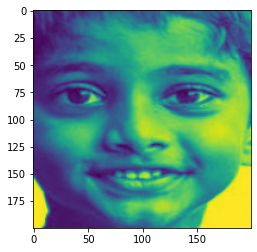

In [10]:
plt.imshow(x[100])

In [11]:
x_updated = x.reshape(len(x), -1)
x_updated.shape

(2539, 40000)

In [12]:
x_train, xtest, ytrain, ytest = train_test_split(x_updated, y ,random_state = 5,test_size =.15)
print('Splitted Successfully')

Splitted Successfully


In [13]:
x_train.shape, xtest.shape

((2158, 40000), (381, 40000))

In [14]:
print(x_train.max(), x_train.min())
print(xtest.max(), xtest.min())
x_train = x_train/255
xtest=xtest/255
print(x_train.max(), x_train.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC

In [16]:
im_pca = PCA()
im_pca.fit(x_train)
variance_explained_list=im_pca.explained_variance_ratio_.cumsum()
print(variance_explained_list)

[0.18438333 0.28307195 0.37784488 ... 1.         1.         1.        ]


In [17]:
test_x_pca=im_pca.transform(xtest)
train_x_pca=im_pca.transform(x_train)

In [18]:
model=SVC(kernel='rbf',gamma='auto')
model=model.fit(train_x_pca, ytrain)
pred_y = model.predict(test_x_pca)
print('Accuracy :',accuracy_score(ytest,pred_y))

Accuracy : 0.7375328083989501


In [19]:
def svm_grid_search(C, kernel, x_train, ytrain):
    accuracy_score_list = []
    
    for c in C:
        
        svmClassifier = svm.SVC(C = c, kernel = 'rbf')
        svmClassifier.fit(x_train, ytrain.ravel())
        pred_y = svmClassifier.predict(x_train)
        accuracy = accuracy_score(ytrain, pred_y)
        accuracy_score_list.append(accuracy)
        print('Regularization parameters: ', c, 'Accuracy', accuracy)
    
    max_accurarcy_id = accuracy_score_list.index(max(accuracy_score_list))
    return C[max_accurarcy_id] 
    

C, kernel = [0.1 * i for i in range(1, 10)], 'rbf'
opt_C = svm_grid_search(C, kernel, train_x_pca, ytrain)

Regularization parameters:  0.1 Accuracy 0.6946246524559777
Regularization parameters:  0.2 Accuracy 0.73725671918443
Regularization parameters:  0.30000000000000004 Accuracy 0.7687673772011121
Regularization parameters:  0.4 Accuracy 0.788693234476367
Regularization parameters:  0.5 Accuracy 0.8141797961075069
Regularization parameters:  0.6000000000000001 Accuracy 0.8382761816496757
Regularization parameters:  0.7000000000000001 Accuracy 0.8591288229842446
Regularization parameters:  0.8 Accuracy 0.8758109360518999
Regularization parameters:  0.9 Accuracy 0.891566265060241


### OUTPUT FOR PREDICTED AND TESTED

In [71]:
if pred_y[2]>0:
    print('Autistic')
else:
    print('Non-Autistic')


Non-Autistic


In [72]:
if ytest[2]>0:
    print('Autistic')
else:
    print('Non-Autistic')

Non-Autistic


In [73]:
pred_y

array([ 0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0, 10,  0,  0,  1,
        1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,
        0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  1,  1,  0,  0

In [74]:
ytest

array([ 0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  0,
        0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1, 10,  0,  0,  1,
        0,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,
        1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  0,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  0

In [22]:
pickle.dump(model, open('autism.pkl','wb'))

In [23]:
import pickle
model=pickle.load(open('autism.pkl','rb'))

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve

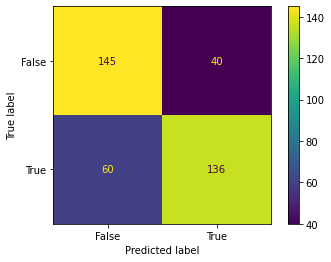

In [33]:
confusion_matrix = metrics.confusion_matrix(ytest,pred_y)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [28]:
import sklearn.metrics as metrics

In [29]:
Precision = metrics.precision_score(ytest,pred_y)
print("Precision of the model is : ",Precision)

Precision of the model is :  0.7727272727272727


In [30]:
Sensitivity_recall = metrics.recall_score(ytest,pred_y)
print("Sensitivity_recall of the model is : ",Sensitivity_recall)

Sensitivity_recall of the model is :  0.6938775510204082


In [31]:
Specificity = metrics.recall_score(ytest,pred_y, pos_label=0)
print("Specificity of the model is : ",Specificity)

Specificity of the model is :  0.7837837837837838


In [32]:
F1_score = metrics.f1_score(ytest,pred_y)
print("F1_score of the model is : ",F1_score)

F1_score of the model is :  0.7311827956989247
